In [1]:
#Loading The Libraries

#For uploading and accessing the data
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Introduction

### Aim of the Model
- The aim of the models is to be able to succesfully identify patients with cardiovascular disease

## Description of data
The selected dataset consists of physical attributes of a human. Some features are measured values, others are determined by the patient. The features will be discussed below in more detail. The important target variable is whether cariovascular disease is present in the patient or not.

The dataset was published by the Medical Center, Long Beach and Cleveland Clinic Foundation.

## Attributes

 *1. age**: The person's age in years

 **2. sex**: The person's sex (1 = male, 0 = female)

 **3. cp**: Chest pain type 
            * 0: Typical angina: chest pain related decrease blood supply to the heart
            * 1: Atypical angina: chest pain not related to heart
            * 2: Non-anginal pain: typically esophageal spasms (non heart related)
            * 3: Asymptomatic: chest pain not showing signs of disease
            
**4. trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**5. chol**: The person's cholesterol measurement in mg/dl

**6. fbs**: the perdon's fasting blood sugar > 120 mg/dl. (1 = true; 0 = false)

**7. restecg**: Resting electrocardiographic results

     0: Nothing to note
     1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
     2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
        
**8. thalach**: Maximum heart rate achieved

**9. exang**: Exercise induced angina (1 = yes; 0 = no)

**10. oldpeak**: - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**11. slope**: - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
**12. ca**: Number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
**13. thal**: Thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    
**14. target**: Person have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

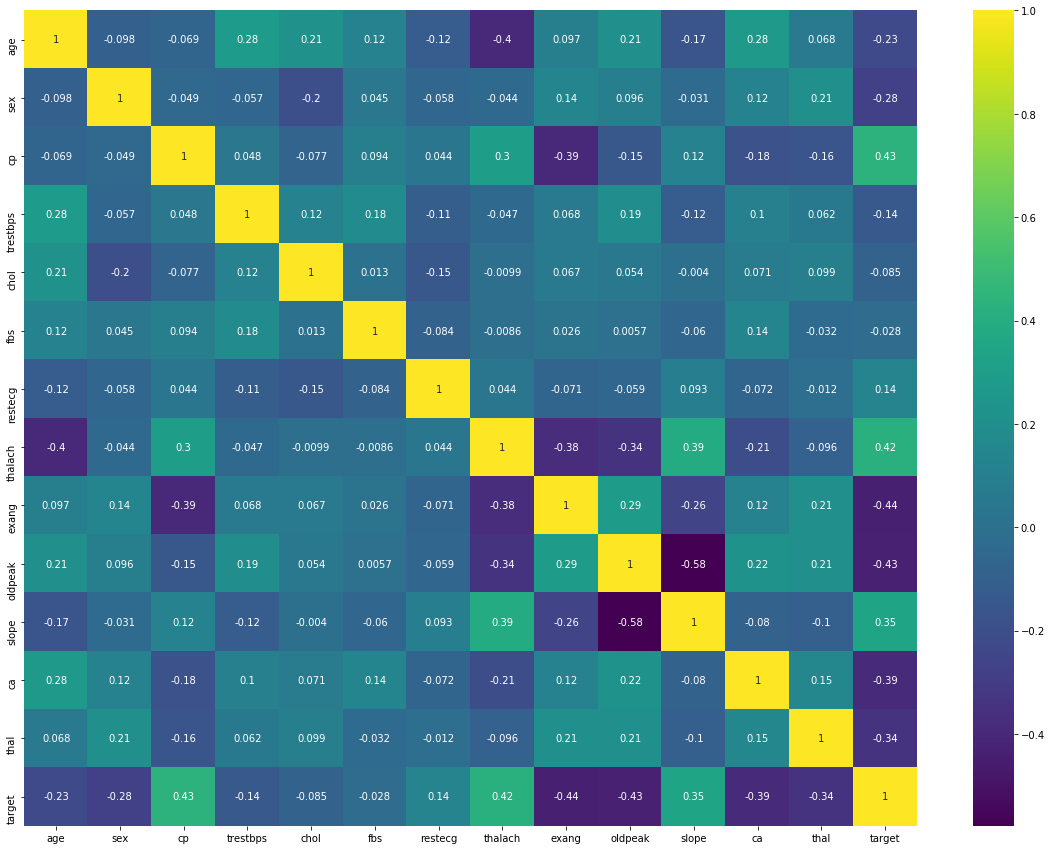

In [6]:
#correlation for each feature in the dataset
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

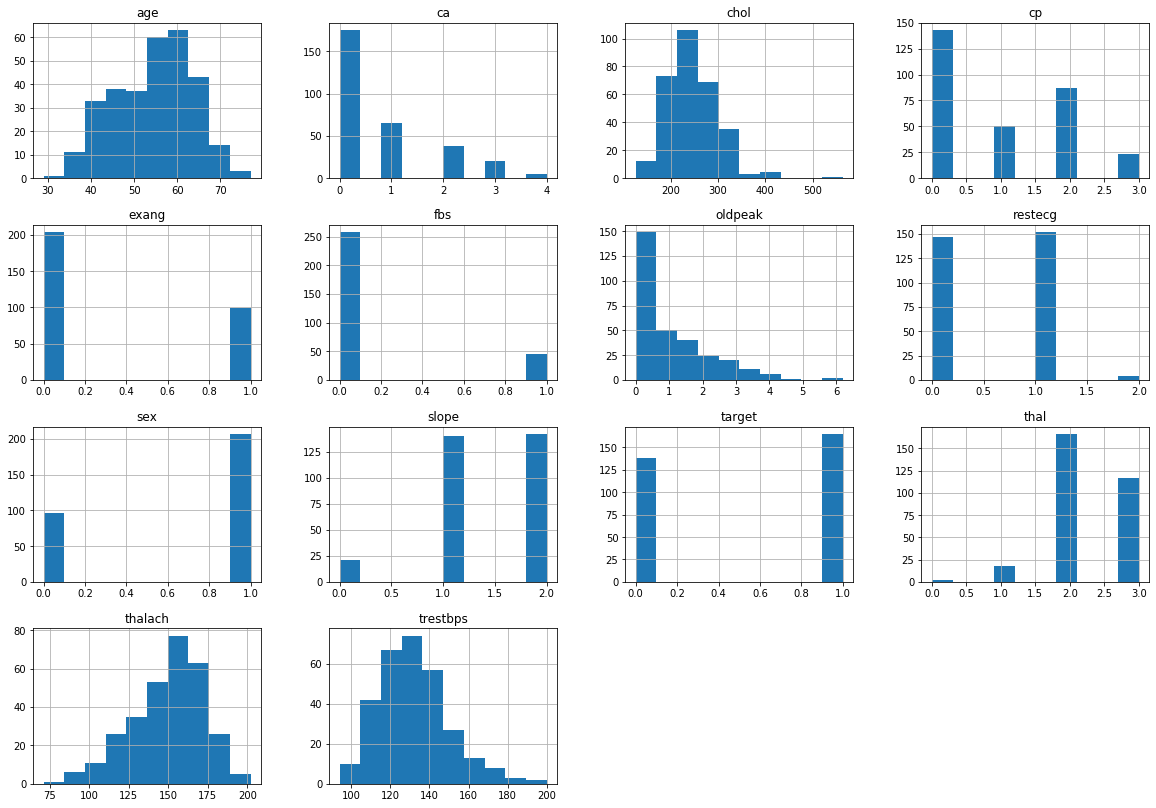

In [6]:
df.hist(figsize=(20,14))
plt.show()

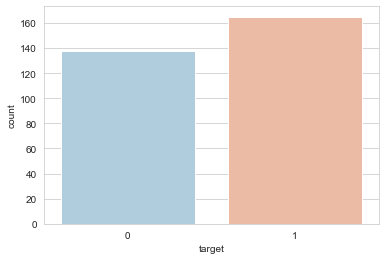

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

#### Renaming the column headers for better understanding of visualizations.

In [9]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

In [10]:
df2 = df.copy()
df1 = df.copy()
df.head()
#1 = Male and 0 = Female in 'Sex' column.

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

##### Replacing the values for Sex and Heart_Attack colummns as these will make the understanding of visualizations better instead of numeric values.

In [12]:
df1['Sex'].replace({1:'Male',0:'Female'},inplace = True)
df1['Heart_attack'].replace({1:'Heart_attack - Yes',0:'Heart_attack - No'},inplace = True)

# Analysis of data by GroupBy and Cmap

###### 1.This shows the total number of heart attacks that have occured for a particular age in case of males and females. 
In the top 20 count of heart attack, males have witnessed more heart attacks for their ages.

In [13]:
s= df1.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(20).style.background_gradient(cmap='Purples')

,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


##### 2. The Males having chest pain type 0 suffered the most heart attacks and type 2 the second highest. This trend is same for females.

In [14]:
s= df1.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


###### 3.The resting blood pressure and the cases of heart attack for such pressure in case of males and females.

In [15]:
s= df1.groupby(['Sex','Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,Resting_blood_pressure,Heart_attack
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


##### 4.Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

In [16]:
s= df1.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


##### 5.This shows relation of Fasting blood sugar with heart attack in case of Male and Females.

In [17]:
s= df1.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


##### 6.This shows the lower the ECG Results, the more cases of heart attack occurred.

In [18]:
s= df1.groupby(['Sex','ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,ECG_results,Heart_attack
3,Male,0,103
4,Male,1,103
1,Female,1,49
0,Female,0,44
2,Female,2,3
5,Male,2,1


##### 7.The maximum heart rate varied for heart attack and were higher for males resulting in heart attack

In [19]:
s= df1.groupby(['Sex','Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,Sex,Maximum_heart_rate,Heart_attack
86,Male,144,7
77,Male,132,7
103,Male,162,7
113,Male,173,7
82,Male,140,6
42,Female,172,6
91,Male,150,6
70,Male,125,6
97,Male,156,6
34,Female,163,5


##### 8.Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [20]:
s= df1.groupby(['Sex','Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,Sex,Exercise_induced_angina,Heart_attack
2,Male,0,130
3,Male,1,77
0,Female,0,74
1,Female,1,22


##### 9.The lower the depression, the higher the cases were for heart attack.

In [21]:
s= df1.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0.000000,64
0,Female,0.000000,35
37,Male,1.200000,13
34,Male,0.800000,10
36,Male,1.000000,9
41,Male,1.800000,8
38,Male,1.400000,8
33,Male,0.600000,8
43,Male,2.000000,7
40,Male,1.600000,7


##### 10.The higher the slope value, the higher were the cases for Heart attack.

In [22]:
s= df1.groupby(['Sex','ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,ST_slope,Heart_attack
5,Male,2,96
4,Male,1,95
2,Female,2,46
1,Female,1,45
3,Male,0,16
0,Female,0,5


##### 11.The lower the number of vessels blocked, the higher were the heart attack cases. This means that 0 represents that all 4 major blood vessels were blocked and 4 represented all vessels were free for flow.

In [23]:
s= df1.groupby(['Sex','Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Major_vessels,Heart_attack
4,Male,0,111
0,Female,0,64
5,Male,1,50
6,Male,2,25
7,Male,3,16
1,Female,1,15
2,Female,2,13
8,Male,4,5
3,Female,3,4


##### 12.The higher the Thalassemia type, the higher were the cases of heart attack.

In [24]:
s= df1.groupby(['Sex','Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,Thalassemia_types,Heart_attack
7,Male,3,102
6,Male,2,87
2,Female,2,79
5,Male,1,17
3,Female,3,15
0,Female,0,1
1,Female,1,1
4,Male,0,1


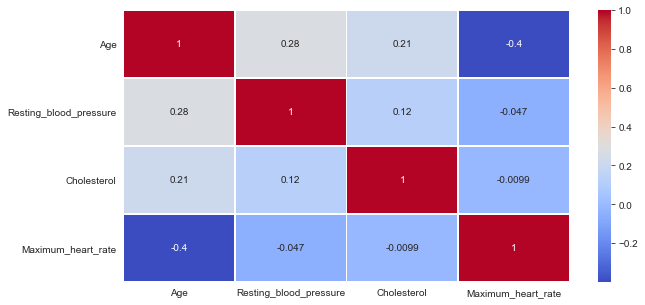

In [25]:
df2.drop(['Sex','Fasting_blood_sugar','Heart_attack','Chest_pain','ECG_results','Exercise_induced_angina','ST_slope','ST_depression','Major_vessels','Thalassemia_types'],axis = 'columns',inplace = True)
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

# Model Selection and Training

In [26]:
#Libraries for model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef



### I have created dummy variables for categorical data to increase the accuracy.

In [27]:
dummy1 = pd.get_dummies(df.Chest_pain)
dummy2 = pd.get_dummies(df.Thalassemia_types)
dummy3 = pd.get_dummies(df.ECG_results)
dummy4 = pd.get_dummies(df.ST_slope)
dummy5 = pd.get_dummies(df.Major_vessels)
merge = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5],axis = 'columns')

In [28]:
final = merge.drop(['Chest_pain','Thalassemia_types','ECG_results','ST_slope','Major_vessels'],axis = 1)
final.head()

,Age,Sex,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Maximum_heart_rate,Exercise_induced_angina,ST_depression,Heart_attack,0,...,1,2,0,1,2,0,1,2,3,4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,0,1,1,0,0,0,0


In [29]:
x = final.drop(['Heart_attack'], axis = 1)
y = final['Heart_attack']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

#### Feature Scaling

In [31]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# Decision Trees

In [32]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=5, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [33]:
y_pred = clf_entropy.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

##### ACCURACY SCORE

In [34]:
print("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 90.1639344262295)

##### F1  SCORE

In [35]:
print("F1 score is "), f1_score(y_test,y_pred)*100

F1 score is 


(None, 90.625)

##### PRECISION SCORE

In [36]:
print("Precision score is "), precision_score(y_test,y_pred)*100

Precision score is 


(None, 87.87878787878788)

##### RECALL SCORE

In [37]:
print("Recall score is "), recall_score(y_test,y_pred)*100

Recall score is 


(None, 93.54838709677419)

##### Matthews Correlation Coefficient

In [38]:
print("Matthews correlation coefficient is "), matthews_corrcoef(y_test,y_pred)*100

Matthews correlation coefficient is 


(None, 80.4750708270836)

# K-Nearest Neighbors

In [39]:
#finding the n_neighbor value
import math
math.sqrt(len(y_test))

7.810249675906654

In [40]:
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [41]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [42]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

##### ACCURACY SCORE

In [43]:
print("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 91.80327868852459)

##### F1 SCORE

In [63]:
print("F1 score is "), f1_score(y_test,y_pred)*100

F1 score is 


(None, 92.3076923076923)

##### PRECISION SCORE

In [64]:
print("Precision score is "), precision_score(y_test,y_pred)*100

Precision score is 


(None, 88.23529411764706)

##### RECALL SCORE

In [79]:
print("Recall score is "), recall_score(y_test,y_pred)*100

Recall score is 


(None, 96.7741935483871)

##### Matthews Correlation Coefficient

In [78]:
print("Matthews correlation coefficient is "), matthews_corrcoef(y_test,y_pred)*100

Matthews correlation coefficient is 


(None, 83.98445462992558)

In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  4]
 [ 1 30]]
